In [9]:
import pandas as pd
import json
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt

In [73]:
def read_stats(codec,video,length,beta):
    name = f"result-{codec}-{video}"
    if length == 2:
        name += "-2sec"
    if beta:
        name += "--beta"
    
    tries = 0
    data = {
        "num_stall": [],
        "dur_stall": []
    }
    try:
        while True:
            path = f"../results/{name}-{str(tries+1)}.json"
            with open(path) as f:
                d = json.load(f)
                data["num_stall"].append(d["num_stall"])
                data["dur_stall"].append(d["dur_stall"])
            tries += 1
    except:
        pass

    data["num_stall"] = sum(data["num_stall"])/len(data["num_stall"])
    data["dur_stall"] = sum(data["dur_stall"])/len(data["dur_stall"])
    return data


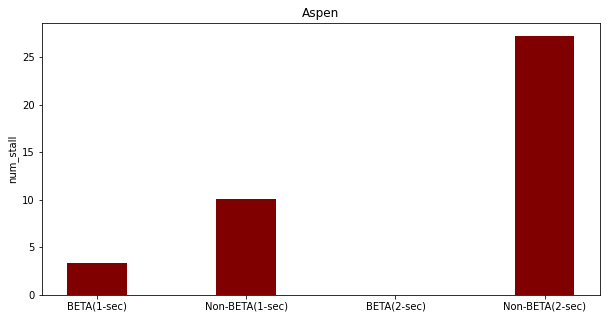

In [74]:
video = "Football"
codec = "hevc"
prop = "dur_stall"

data = {}
data["BETA(1-sec)"] = read_stats(codec, video, 1, True)[prop]
data["Non-BETA(1-sec)"] = read_stats(codec, video, 1, False)[prop]
data["BETA(2-sec)"] = read_stats(codec, video, 2, True)[prop]
data["Non-BETA(2-sec)"] = read_stats(codec, video, 2, False)[prop]
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
# plt.xlabel("Courses offered")
plt.ylabel("num_stall")
plt.title("Aspen")
plt.show()


,BETA(1-sec),Non-BETA(1-sec),BETA(2-sec),Non-BETA(2-sec)
Aspen,2.851885,9.582165,2.960858,40.656509
BBB,5.960595,14.556862,2.206538,37.177490
Burn,3.236029,7.834810,0.000000,23.380874
Football,3.334383,10.123520,0.000000,27.222653


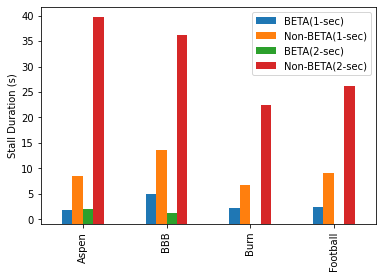

In [75]:
codec = "av1"
prop = "dur_stall"

groups = []
videos = ['Aspen', 'BBB', "Burn", "Football"]

for video in videos:
    data = []
    data.append(read_stats(codec, video, 1, True)[prop])
    data.append(read_stats(codec, video, 1, False)[prop])
    data.append(read_stats(codec, video, 2, True)[prop])
    data.append(read_stats(codec, video, 2, False)[prop])
    groups.append(data)


# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=videos)
# df
df = df.rename(columns={
    0:"BETA(1-sec)",
    1:"Non-BETA(1-sec)",
    2:"BETA(2-sec)",
    3:"Non-BETA(2-sec)",
})
ax = df.plot.bar(bottom=-1)
ax.set_ylabel("Stall Duration (s)")
# ax.set_ylim(-1)
df